In [1]:
data_dir= '/n/holylfs/LABS/wadduwage_lab/Lab/wadduwage-lab-data/Confocal/20200210_confocal-3d_Seeber-lab_h2ax-cells/63xZseriesSmall'

In [2]:
import glob
from tifffile import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import skimage.filters
import torch
import shutil, os
import cv2
import torchvision

In [4]:
def save_imgs(sample_dirs, save_dir, filter_img_func, patch_size= 256):
    for sample_dir in sample_dirs:
        img= imread(sample_dir)
        im_max= np.max(img, axis=0)
        im_max_filt= torch.from_numpy(filter_img_func(im_max).astype('float'))

        patches= im_max_filt.reshape(im_max_filt.shape[0]//patch_size, patch_size, im_max_filt.shape[0]//patch_size, patch_size).permute(0, 2, 1, 3).flatten(end_dim= 1)
        
        for idx in range(len(patches)):
            patch= patches[idx].numpy()
            save_img_name = sample_dir.split('/')[-1][:-4]
            save_path= f'{save_dir}/{save_img_name}_{idx}.png'
            #plt.imsave(save_path , patch)
            cv2.imwrite(save_path , (255*patch).astype('uint8'))
        type_ = save_path.split('/')[-2]
        print(f'{type_} set -> saving : {save_path}')

In [6]:
def clip_thres500(img):return np.clip(img, 0, 500)/500.0

def preprocess(img):
    B= 134.28
    img_clipped = np.clip(im_max, B, 500) 
    img_norm= (img_clipped - img_clipped.min())/(img_clipped.max()- img_clipped.min())
    return img_norm

In [33]:
def save_imgs_for_dataloaders(stk_file_dirs, save_data_root_dir, type_, filter_img_func, patch_size):
    save_dir= f'{save_data_root_dir}/{type_}'
    try:shutil.rmtree(save_dir)
    except:pass

    os.mkdir(save_dir)

    save_imgs(stk_file_dirs, save_dir, filter_img_func= filter_img_func, patch_size= patch_size)

In [ ]:
sample_dirs =  sorted(glob.glob(f'{data_dir}/*_w1*.stk'), key= lambda x: int(x.split('/')[-1][:-4].split('_')[-1][1:]))

save_data_root_dir= '/n/holyscratch01/wadduwage_lab/uom_Udith/datasets/confocal/63xZseriesSmall_w1'

n_stk_files= len(sample_dirs)

save_imgs_for_dataloaders(sample_dirs[: int(n_stk_files*0.8)], save_data_root_dir, 'train', filter_img_func= preprocess, patch_size= 256)
save_imgs_for_dataloaders(sample_dirs[int(n_stk_files*0.8):int(n_stk_files*0.9)], save_data_root_dir, 'val', filter_img_func= preprocess, patch_size= 256)
save_imgs_for_dataloaders(sample_dirs[int(n_stk_files*0.9):], save_data_root_dir, 'test', filter_img_func= preprocess, patch_size= 256)

#save_imgs_for_dataloaders(sample_dirs[: 2], save_data_root_dir, 'train', filter_img_func= preprocess, patch_size= 256)
#save_imgs_for_dataloaders(sample_dirs[: 2], save_data_root_dir, 'val', filter_img_func= preprocess, patch_size= 256)
#save_imgs_for_dataloaders(sample_dirs[: 2], save_data_root_dir, 'test', filter_img_func= preprocess, patch_size= 256)

# Load data using DataLoaders

total images found in: /n/holyscratch01/wadduwage_lab/uom_Udith/datasets/confocal/63xZseriesSmall_w1//train -> 13608
total images found in: /n/holyscratch01/wadduwage_lab/uom_Udith/datasets/confocal/63xZseriesSmall_w1//val -> 1701
total images found in: /n/holyscratch01/wadduwage_lab/uom_Udith/datasets/confocal/63xZseriesSmall_w1//test -> 1701


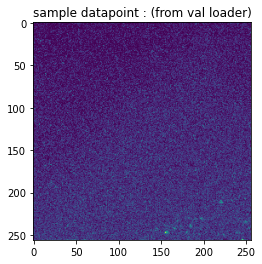

dataset value range :  1.0000001111620804e-06 1.0


In [17]:
import sys
sys.path.append('../')

from modules.datasets import *
from modules.data_utils import return_dataloaders

get_dataset_func= confocal #mnistdigits_grid2patch

img_size= 256
delta= 0.000001
num_samples_train= 10000
batch_size_train= 32

trainset, valset, testset = get_dataset_func(img_size= img_size, delta= delta, num_samples_train= num_samples_train)
train_loader, val_loader, test_loader = return_dataloaders(trainset, valset, testset, batch_size_train= batch_size_train)


In [18]:
for idx, (x, y) in enumerate(train_loader):
    break
    
x.shape, y.shape

(torch.Size([32, 1, 256, 256]), torch.Size([32]))

In [19]:
x.min(), x.max()

(tensor(1.0000e-06), tensor(1.))

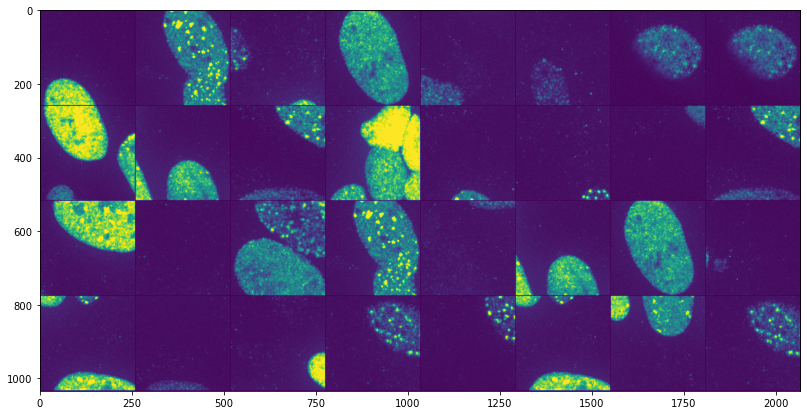

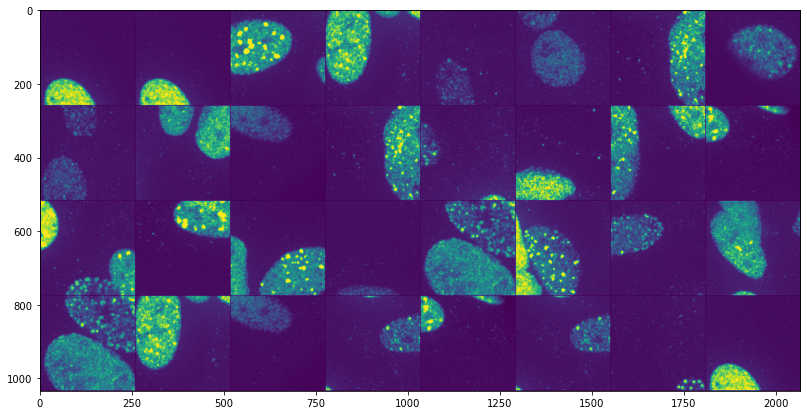

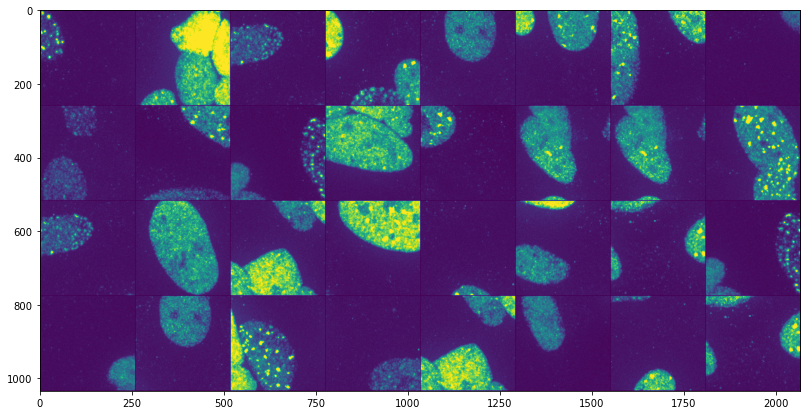

In [46]:
import cv2
for idx, (x, y) in enumerate(train_loader):
    if idx > 2:break
    #print(x.shape, y)
    grid_img = torchvision.utils.make_grid(x, nrow=8)
    plt.figure(figsize= (15, 7))
    plt.imshow(cv2.cvtColor(grid_img.permute(1,2,0).numpy(), cv2.COLOR_RGB2GRAY))
    plt.show()

In [50]:
x.min()

tensor(1.0000e-06)